# ExtraaLearn Project
**Arthur: Chiuhua Huang**
## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To split the data
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn import tree
from sklearn.model_selection import cross_val_score
# For tuning the model
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv("ExtraaLearn.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### Observation:
1. There are 4612 rows and 15 columns.
2. All columns have 4612 non-null values, there are no missing values in the data.

## Exploratory Data Analysis (EDA)

In [3]:
# Statistic summary of continuous variables
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


#### Observation: 
* status should be categorical data.

In [4]:
### correlation between numerical columns
cormat =df[["age","website_visits","time_spent_on_website","page_views_per_visit"]].corr()
round(cormat,2)

,age,website_visits,time_spent_on_website,page_views_per_visit
age,1.00,-0.01,0.02,-0.04
website_visits,-0.01,1.00,0.06,0.07
time_spent_on_website,0.02,0.06,1.00,0.07
page_views_per_visit,-0.04,0.07,0.07,1.00


#### Observation:
* The correlation between numerical datas are low. There is no colliniarity between the numerical data.

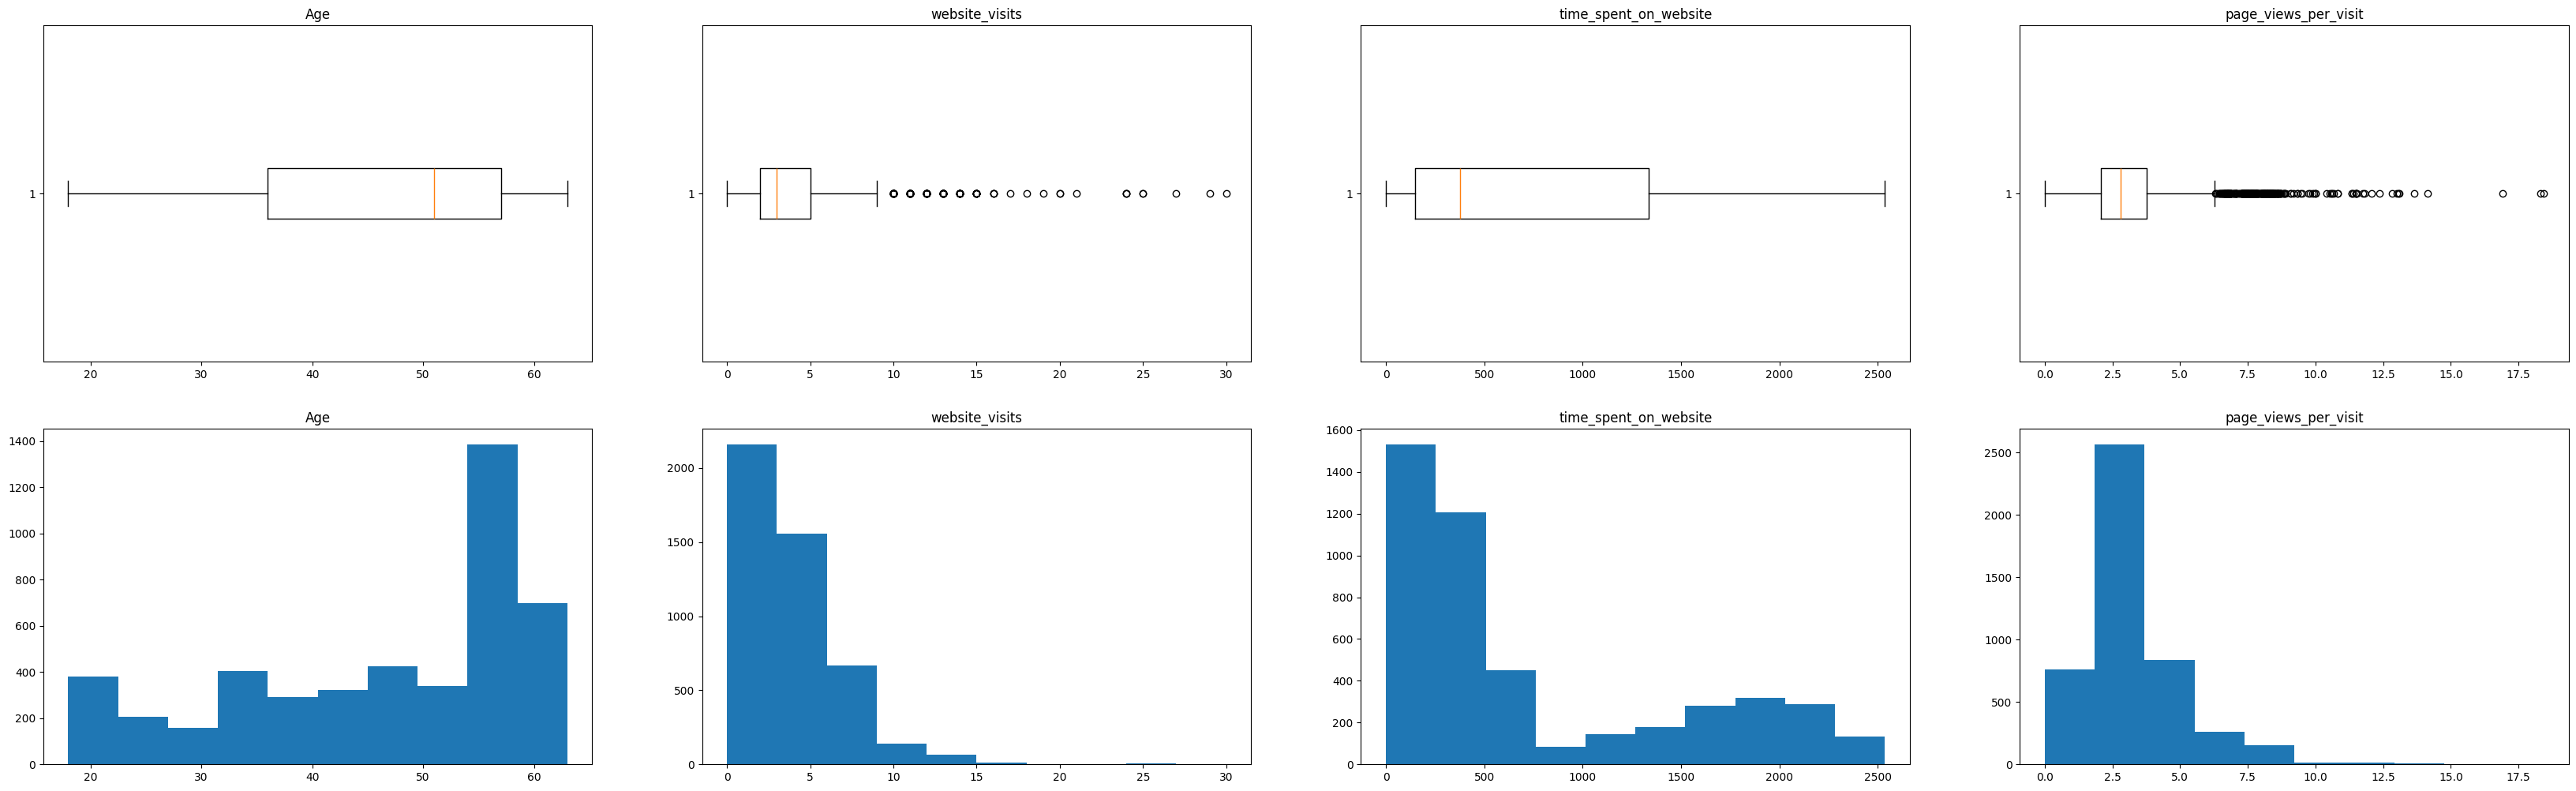

In [5]:
### box plot
fig, axs = plt.subplots(nrows = 2, ncols=4)
### age 
axs[0,0].boxplot(df["age"], vert = False)
axs[0,0].set_title('Age')
axs[1,0].hist(df["age"])
axs[1,0].set_title('Age')
### website_visits
axs[0,1].boxplot(df["website_visits"], vert = False)
axs[0,1].set_title("website_visits")
axs[1,1].hist(df["website_visits"])
axs[1,1].set_title('website_visits')
### time_spent_on_website
axs[0,2].boxplot(df["time_spent_on_website"], vert = False)
axs[0,2].set_title("time_spent_on_website")
axs[1,2].hist(df["time_spent_on_website"])
axs[1,2].set_title('time_spent_on_website')
### page_views_per_visit
axs[0,3].boxplot(df["page_views_per_visit"], vert = False)
axs[0,3].set_title("page_views_per_visit")
axs[1,3].hist(df["page_views_per_visit"])
axs[1,3].set_title('page_views_per_visit')
### adjust plot format
fig.subplots_adjust(left=1, right=6, bottom=0.05, top=2,
                    hspace=0.2, wspace=0.2)

#### Obeservation:
1. The range of age in the data is 18 to 63 years old, with an average at 46.
2. Website_visits and page_views_per_visit are right skewed. Most leads have less time spent on the website. Also there are outliers in these two variable.
3. Base on time_spent_on_website's distribution, there is a significant gap at 750. This might indicate that there are two types of behavior on the website, One is the ones spent much less time on website and the other with more time spending on website.

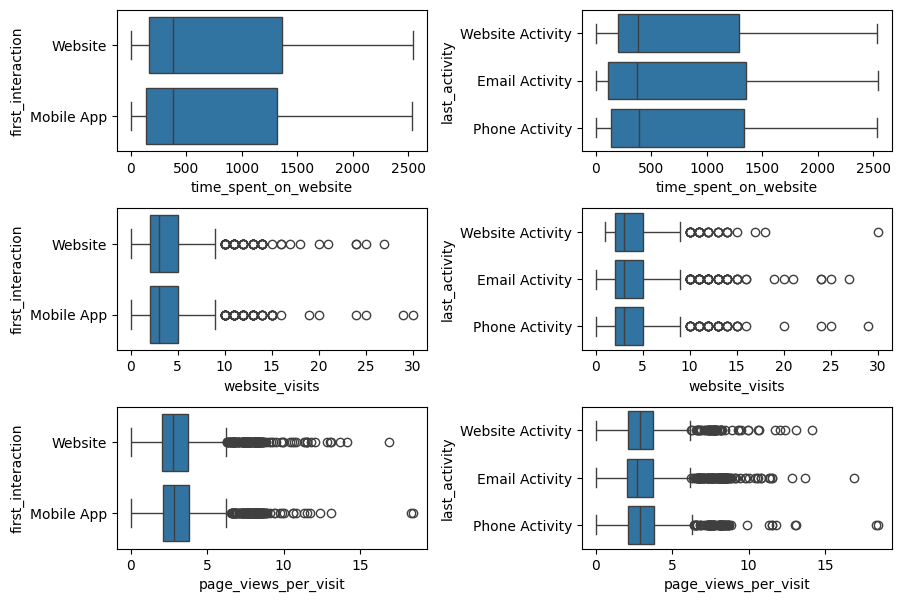

In [6]:
### boxplot of multivariate analyze, since the time spent on website might be affect by the channel Leads use to connect with the service. Thus, we analyze the time spent with the channel columns(first interaction and last activity).
fig, axs = plt.subplots(3, 2, figsize=(10, 7))
sns.boxplot(x=df["time_spent_on_website"], y=df["first_interaction"],  ax=axs[0,0])
sns.boxplot(x=df["time_spent_on_website"], y=df["last_activity"],  ax=axs[0,1])
sns.boxplot(x=df["website_visits"], y=df["first_interaction"], ax=axs[1,0])
sns.boxplot(x=df["website_visits"], y=df["last_activity"], ax=axs[1,1])
sns.boxplot(x=df["page_views_per_visit"], y=df["first_interaction"], ax=axs[2,0])
sns.boxplot(x=df["page_views_per_visit"], y=df["last_activity"], ax=axs[2,1])
fig.subplots_adjust(hspace=0.4, wspace=0.5)

### Observation:
* The graph shows that the time_spent_on_website, website_visits and page_views_per_visit does no have significant difference the type of first interaction or last_activity.

In [7]:
# Statistic summary of discrete variables
df.describe(include=['O'])

,ID,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
count,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612
unique,4612,3,2,3,3,2,2,2,2,2
top,EXT001,Professional,Website,High,Email Activity,No,No,No,No,No
freq,1,2616,2542,2264,2278,4115,4379,4085,3907,4519


#### Observation:
*  ID is unique the unique value in the data, we can remove it from the data.

### Question 1: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

In [8]:
def cross_contable(colA, change_order = False):
    ax = pd.crosstab(index=df[colA], columns=df['status']).apply(lambda r: r/r.sum()*100, axis=1)
    if change_order ==True:
        ax= ax.reindex(['Low', 'Medium', 'High'])
    ax_1 = ax.plot.barh(figsize=(7,3),stacked=True, rot=0)
    display(ax)
    plt.legend(loc='right', bbox_to_anchor=(1.15,0.5),title = "Status")
    plt.xlabel('Percentage')
    plt.ylabel(colA)
    for rec in ax_1.patches:
        height = rec.get_height()
        ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.1f}%".format(rec.get_width()),
              ha='center', 
              va='bottom')
    plt.show()

status,0,1
current_occupation,,
Professional,64.487768,35.512232
Student,88.288288,11.711712
Unemployed,73.421235,26.578765


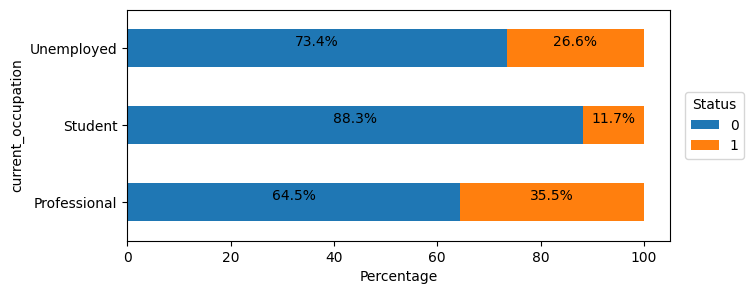

In [9]:
### draw stacked plot of current_occupation vs status
cross_contable("current_occupation")

#### Observation:
1. Around of 36% of Leads whos current occupation is Professional are converted to paid customers(P(Status = 1|Current_Occupation = Professional)). 
2. Students are less likely to convert to paid customers.

### Question 2: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

status,0,1
first_interaction,,
Mobile App,89.468599,10.531401
Website,54.405980,45.594020


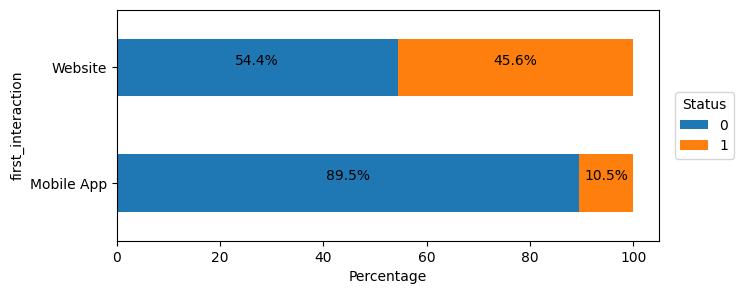

In [10]:
cross_contable('first_interaction')

#### Observation:
* The Leads are more likely to convert to paided costomer if the first interaction is **website**. This means that the UI/UX might need to be imporve in mobile App.

### Ouestion 3: The company uses multiple modes to interact with prospects. Which way of interaction works best? 

status,0,1
last_activity,,
Email Activity,69.666374,30.333626
Phone Activity,78.687196,21.312804
Website Activity,61.545455,38.454545


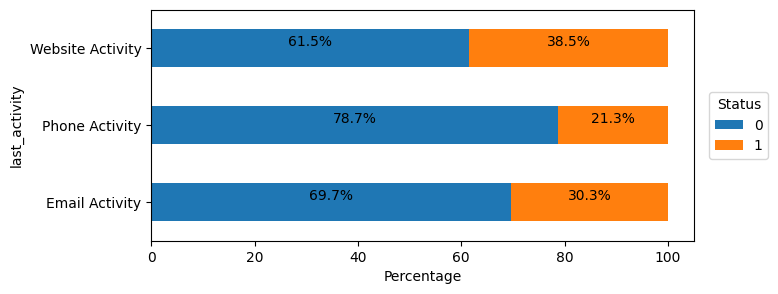

In [11]:
cross_contable('last_activity')

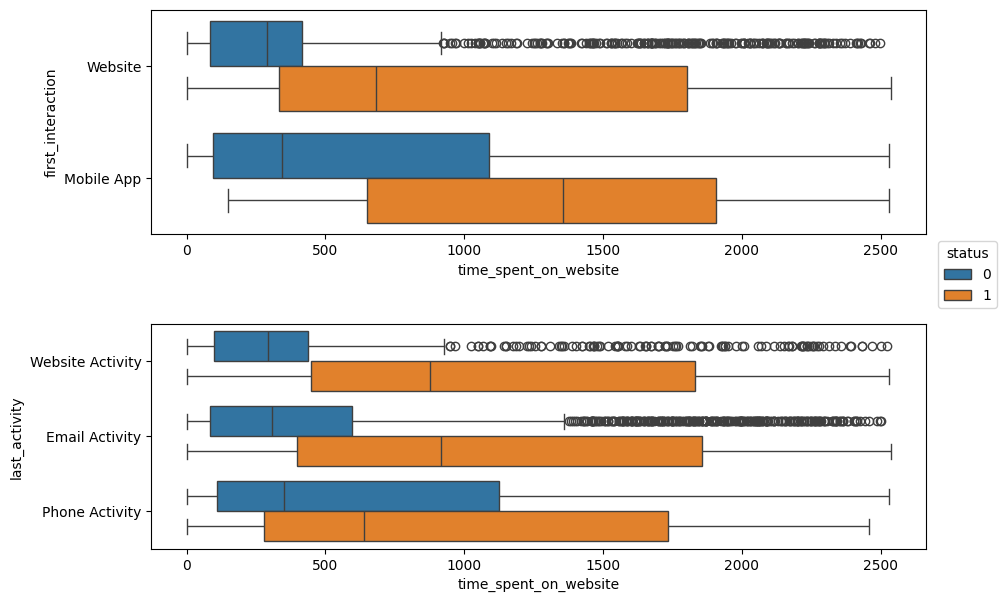

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
sns.boxplot(x=df["time_spent_on_website"], y=df["first_interaction"], hue = df["status"], ax=axs[0],legend = False)
b = sns.boxplot(x=df["time_spent_on_website"], y=df["last_activity"], hue = df["status"],  ax=axs[1])
sns.move_legend(b, loc = "upper right",  bbox_to_anchor=(1.1, 1.4))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

#### Observation:
1. It seems that the website works the best among different interaciton since 38.5% of the Leads convert into paid customers.
2. With more time spending on the website, the Lead is more likely to convert to paid customers.

### Question 4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

In [13]:
### calculate conversion rate
def conversion_rate(col, data):
    df = data.loc[data[col]=="Yes",[col,"status"]]
    paided_customer = len(df[df["status"]==1])
    convert_rate = round(100*paided_customer/len(df),2)
    return convert_rate

In [14]:
### categorical variable
c = list(df.select_dtypes("object").columns)
### print out conversion rate
highest_lead_conversion_rate = 0
highest_conversion_channel = "NA"
for col in df[c[5:]].columns:
    print("The conversion rate of {column_name!r} is {convert_rate}%.".format(column_name = col, convert_rate = conversion_rate(col, df)))
    if highest_lead_conversion_rate < conversion_rate(col,df):
        highest_lead_conversion_rate = conversion_rate(col,df)
        highest_conversion_channel = col
print("-"*80)
print("Channel {channel!r} has the highest lead conversion rate({rate}%).".format(channel = highest_conversion_channel, rate = highest_lead_conversion_rate))

The conversion rate of 'print_media_type1' is 31.99%.
The conversion rate of 'print_media_type2' is 32.19%.
The conversion rate of 'digital_media' is 31.88%.
The conversion rate of 'educational_channels' is 27.94%.
The conversion rate of 'referral' is 67.74%.
--------------------------------------------------------------------------------
Channel 'referral' has the highest lead conversion rate(67.74%).


#### Observation:
Channel 'referral' has the highest lead conversion rate(67.74%).

### Question 5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

status,0,1
profile_completed,,
Low,92.523364,7.476636
Medium,81.124498,18.875502
High,58.215548,41.784452


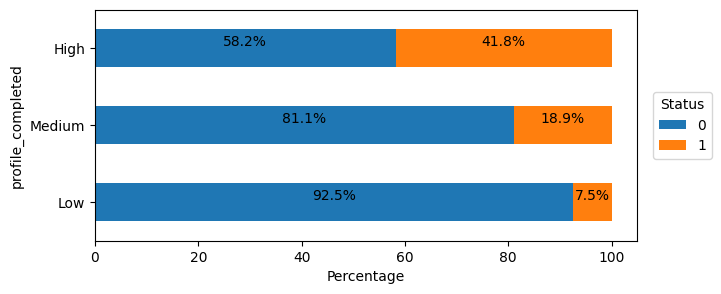

In [15]:
cross_contable("profile_completed", True)

#### Observation:
The higher the profile is complete, the more often Leads are convert into paid customer. A higher rate of profile completion also means that the lead has more confident and more interest in the service.

## Data Preprocessing

### 1. remove ID column

In [16]:
### remove ID column
df1 = df.drop(columns="ID")

### 2. independent and dependent variable

In [17]:
Y = df1["status"]
X = df1.iloc[:,:-1]

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 468.5+ KB


### 3. create dummy variable

In [19]:
### dummy variable
X = pd.get_dummies(data = X, dtype = int)
X.drop(['current_occupation_Professional','first_interaction_Mobile App','profile_completed_Medium','last_activity_Email Activity','print_media_type1_No','print_media_type2_No','digital_media_No','educational_channels_No','referral_No'], axis = 1, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   current_occupation_Student      4612 non-null   int32  
 5   current_occupation_Unemployed   4612 non-null   int32  
 6   first_interaction_Website       4612 non-null   int32  
 7   profile_completed_High          4612 non-null   int32  
 8   profile_completed_Low           4612 non-null   int32  
 9   last_activity_Phone Activity    4612 non-null   int32  
 10  last_activity_Website Activity  4612 non-null   int32  
 11  print_media_type1_Yes           4612 non-null   int32  
 12  print_media_type2_Yes           46

### 4. Split train test data 90%-10%

In [20]:
### prepare train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=105, stratify=Y)

We do not need to scale the data since Decision Tree and Random Forest Model are not sensitive to the variance of data.

## EDA

In [21]:
# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train.shape)
print('X Test Shape:', X_test.shape)
print('Y Train Shape:', y_train.shape)
print('Y Test Shape:', y_test.shape)

X Train Shape: (4150, 16)
X Test Shape: (462, 16)
Y Train Shape: (4150,)
Y Test Shape: (462,)


In [22]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_High,profile_completed_Low,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
450,49,5,6,1.411,0,1,0,0,0,0,0,0,0,0,1,0
2818,59,5,1432,2.196,0,0,1,1,0,0,0,0,0,0,1,1
3280,57,4,111,3.693,0,1,0,0,1,0,0,0,0,0,0,0
1854,35,3,2299,2.227,0,0,0,1,0,0,0,0,0,0,0,0
2072,60,3,399,0.055,0,1,0,0,0,0,0,0,0,1,0,0


In [23]:
print(Y.value_counts(normalize=True),"\n")

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64 



#### Observation:
1. The training data set has 4150 rows with 16 variables.
2. The testing data set has 462 rows.
3. In the dependent variable, we can tell that there is a more dominate class, we need to assign class_weight to the tree.

## Building a Decision Tree model
The decision tree model might become bias to the dominate class, we will set the class_weight of class 0 as 0.7 and class 1 as 0.3.

### Fit and Train Decision Tree model

In [24]:
dt = DecisionTreeClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 10)
dt.fit(X_train, y_train)
### train_data_output
y_train_pred_dt = dt.predict(X_train)
### test_data_output
y_test_pred_dt = dt.predict(X_test)

### Create validation functions
1. metric to see the classification result
2. statistical scores of fitting and prediction

In [25]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted, digits = 4))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(7,5))
    
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Not Convert', 'Convert'], yticklabels=['Not Convert', 'Convert'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [26]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    print("\"RMSE\": {RMSE:.4f}\n\"MAE\": {MAE:.4f}\n\"R-square\": {R2:.4f}\n\"Adj. R-squared\": {AdjR2:.4f}".format(RMSE = rmse, MAE=mae, R2 = r2, AdjR2 = adjr2))

    return df_perf

### Preformence of training data in Decision Tree:

"RMSE": 0.0269
"MAE": 0.0007
"R-square": 0.9965
"Adj. R-squared": 0.9965
**************************************************
              precision    recall  f1-score   support

           0     0.9990    1.0000    0.9995      2911
           1     1.0000    0.9976    0.9988      1239

    accuracy                         0.9993      4150
   macro avg     0.9995    0.9988    0.9991      4150
weighted avg     0.9993    0.9993    0.9993      4150



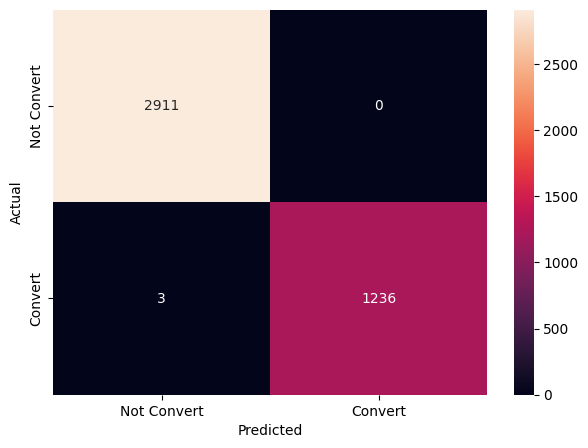

In [27]:
dt_train_perf = model_performance_regression(dt, X_train, y_train)
print("*"*50)
metrics_score(y_train, y_train_pred_dt)

#### Observation:
1. The accuracy is 99.93%. Three of the converted customer is classified as not convert customer.
2. The recall on class 1 is 99.65%.
3. The model seems to fit well on the training data. Next we should check the testing data to make sure the model is not overfitting.

### Preformance of testing data in Decision Tree:

"RMSE": 0.4135
"MAE": 0.1710
"R-square": 0.1837
"Adj. R-squared": 0.1544
**************************************************
              precision    recall  f1-score   support

           0     0.8723    0.8858    0.8790       324
           1     0.7218    0.6957    0.7085       138

    accuracy                         0.8290       462
   macro avg     0.7971    0.7907    0.7938       462
weighted avg     0.8274    0.8290    0.8281       462



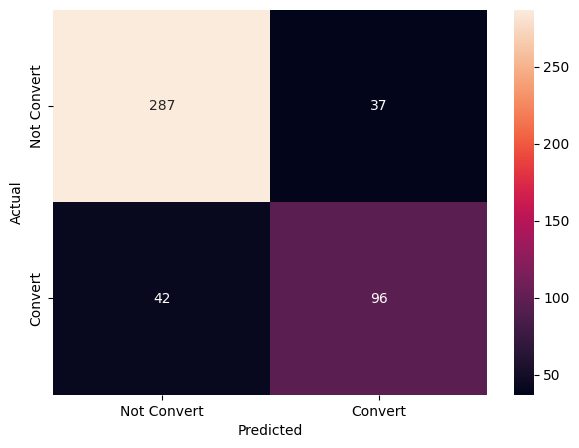

In [28]:
dt_test_perf = model_performance_regression(dt, X_test, y_test)
print("*"*50)
metrics_score(y_test, y_test_pred_dt)

#### Observation:
We can tell that the model is overfitting since the preformance drops significantly in the testing data. Including drop in recall, precision and accuracy.

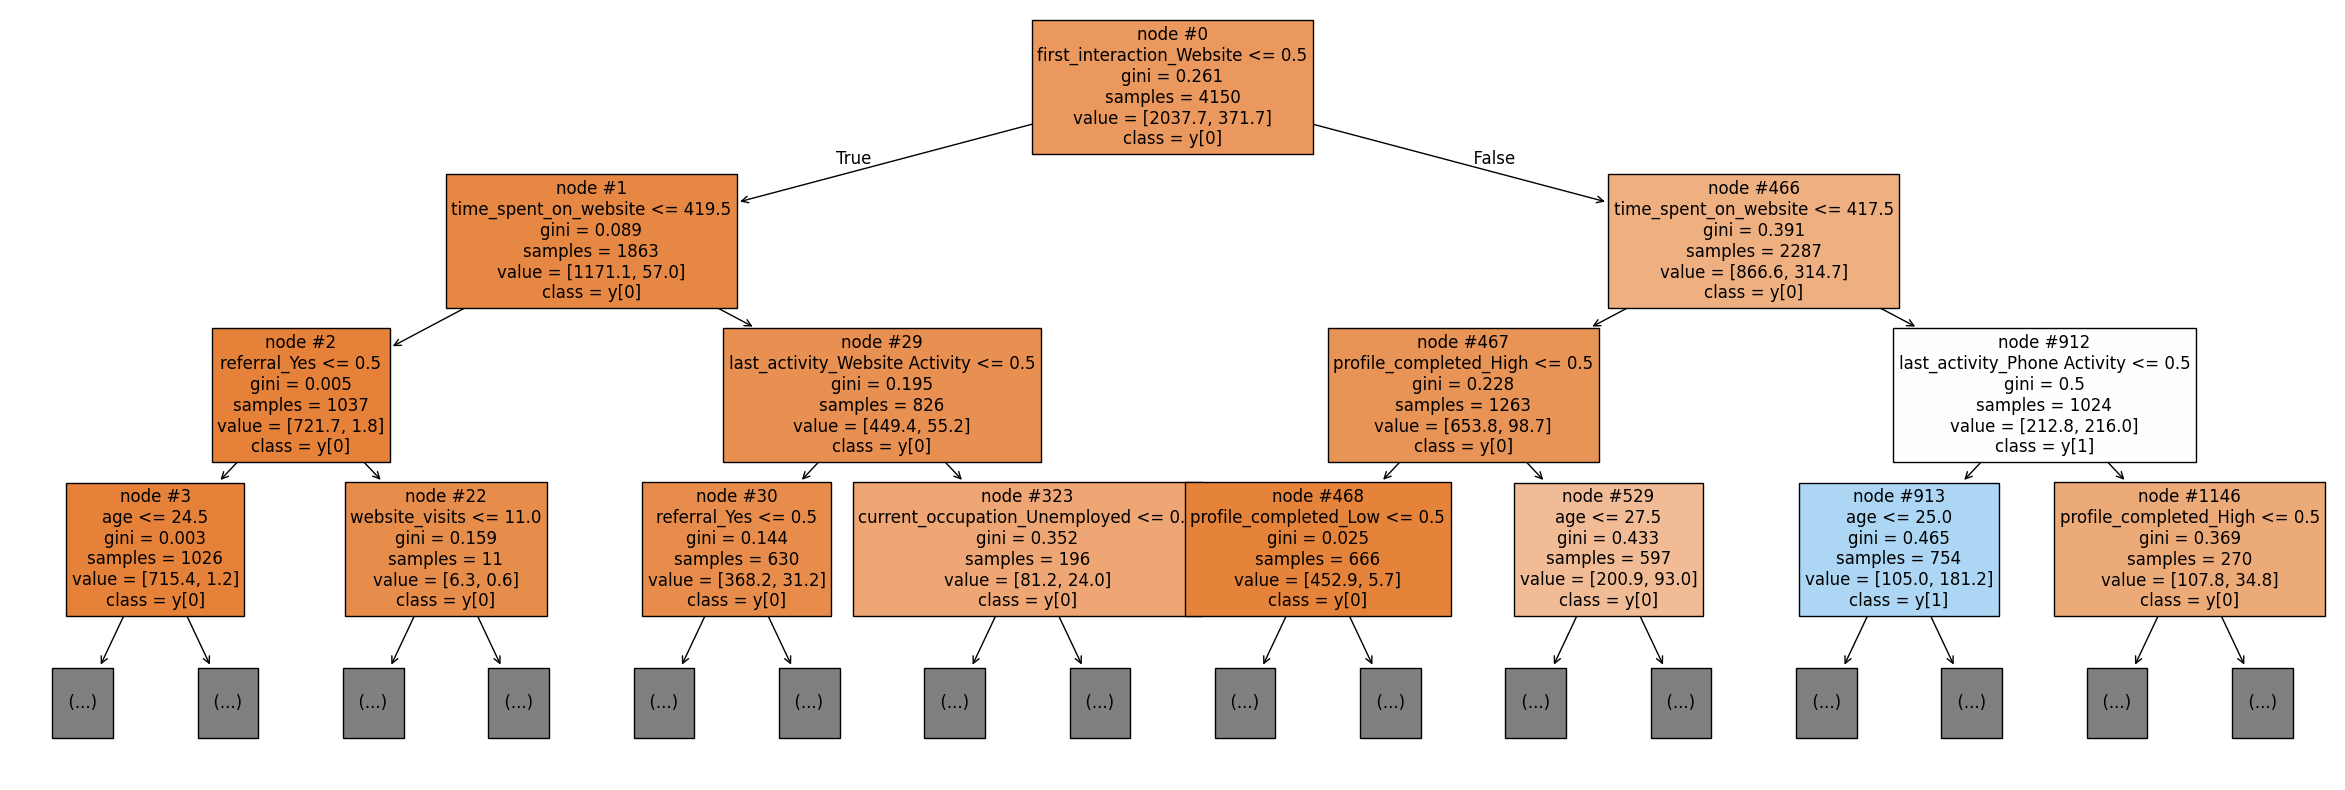

In [29]:
### get a peek at the decision tree
features = list(X.columns)
plt.figure(figsize = (30, 10))
tree.plot_tree(dt, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

#### Observation:
The first node is devided by first_interaction_Website, followed by time spent on website, these two variable might be important factors of Lead converting to paid customer or not.

In [30]:
### model_validation
scores_dt = cross_val_score(dt, X_test, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {round(np.average(scores_dt),4)}.")

The average score of the model with K-5 Cross validation is 0.816.


## Do we need to prune the tree?
Ans. **Yes**, we do. the model is over-fitting.

In [31]:
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,12), 
              'min_samples_leaf': [1, 2, 3, 4] ,
              'max_leaf_nodes' : [5, 10, 15, 20, 25],
              'min_impurity_decrease': [0.001, 0.0],
              'criterion': ['gini', 'entropy'],
              'ccp_alpha': [0.00125, 0.0, 0.001, 0.01]
             }

# Type of scoring used to compare parameter combinations, we use recall score since we want the company to classify the customers that are more likely to transfer into paid customer, and provide better services to them.
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridS_cv = GridSearchCV(dt, parameters, scoring=scorer, cv=5, n_jobs = -1, verbose = 2)
gridS_cv = gridS_cv.fit(X_train, y_train)



print("Best parameters are {} with CV score={:.4f}." .format(gridS_cv.best_params_,gridS_cv.best_score_))

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits
Best parameters are {'ccp_alpha': 0.00125, 'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1} with CV score=0.6561.


#### Observation:
The model has best perfomance with {'ccp_alpha': 0.00125, 'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1}.

### Fit and Predict the model after Pruning

In [32]:
# Fit Best estimate model
dt_prune = gridS_cv.best_estimator_
dt_prune.fit(X_train,y_train)
# train_data_output
y_train_pred_dt_prune = dt_prune.predict(X_train)
# test_data_output
y_test_pred_dt_prune = dt_prune.predict(X_test)

### Preformance of training Data of Decision Tree Model After Pruning

"RMSE": 0.3604
"MAE": 0.1299
"R-square": 0.3798
"Adj. R-squared": 0.3774
**************************************************
              precision    recall  f1-score   support

           0     0.8823    0.9402    0.9104      2911
           1     0.8340    0.7054    0.7643      1239

    accuracy                         0.8701      4150
   macro avg     0.8582    0.8228    0.8373      4150
weighted avg     0.8679    0.8701    0.8668      4150



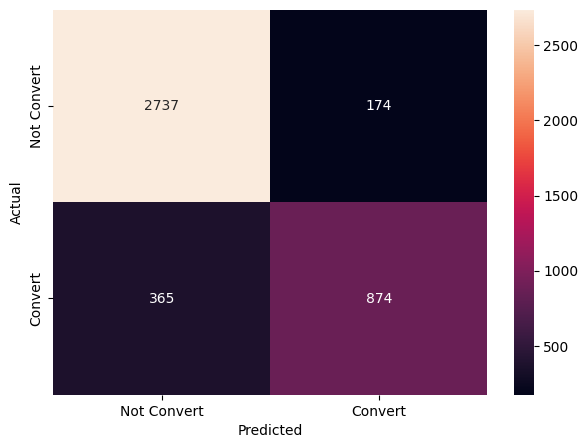

In [33]:
### model preformance
dt_train_perf = model_performance_regression(dt_prune, X_train, y_train)
print("*"*50)
metrics_score(y_train, y_train_pred_dt_prune)

#### Observation:
1. The recall rate is ~0.71, it indicates that 29% of the time will the model classify a customer to a non-convert customer while the customer will actually convert.
2. The Adj. R2 score is only 0.3774, 37% of the variance in the data is explained.
3. The overall accuracy is ~0.87, it is not bad, we should see if the model is overfitting.

### Preformance of testing Data of Decision Tree Model After Pruning

"RMSE": 0.3780
"MAE": 0.1429
"R-square": 0.3180
"Adj. R-squared": 0.2935
**************************************************
              precision    recall  f1-score   support

           0     0.8707    0.9352    0.9018       324
           1     0.8158    0.6739    0.7381       138

    accuracy                         0.8571       462
   macro avg     0.8432    0.8045    0.8199       462
weighted avg     0.8543    0.8571    0.8529       462



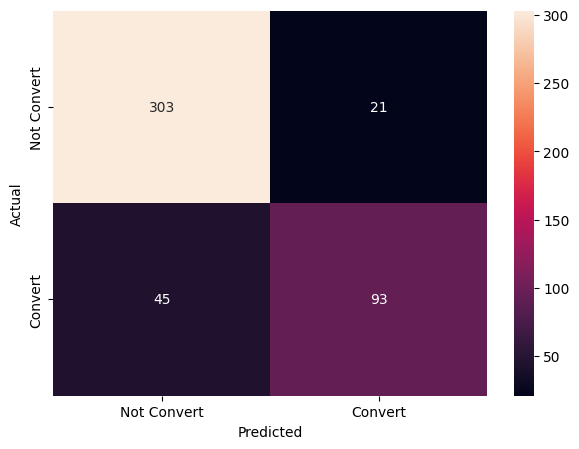

In [34]:
dt_test_perf = model_performance_regression(dt_prune, X_test, y_test)
print("*"*50)
metrics_score(y_test, y_test_pred_dt_prune)

#### Observation:
1. The recall rate is ~0.67, it indicates that 33% of the time will the model classify a customer to a non-convert customer while the customer will actually convert.
2. The Adj. R2 score is only 0.2935, 27% of the variance in the data is explained.
3. The overall accuracy is ~0.86, we compare the training preformance and testing preformance, the accuracy, precision and recall score are close, it indicates that the model is not overfitting.

### Decision Tree after pruning

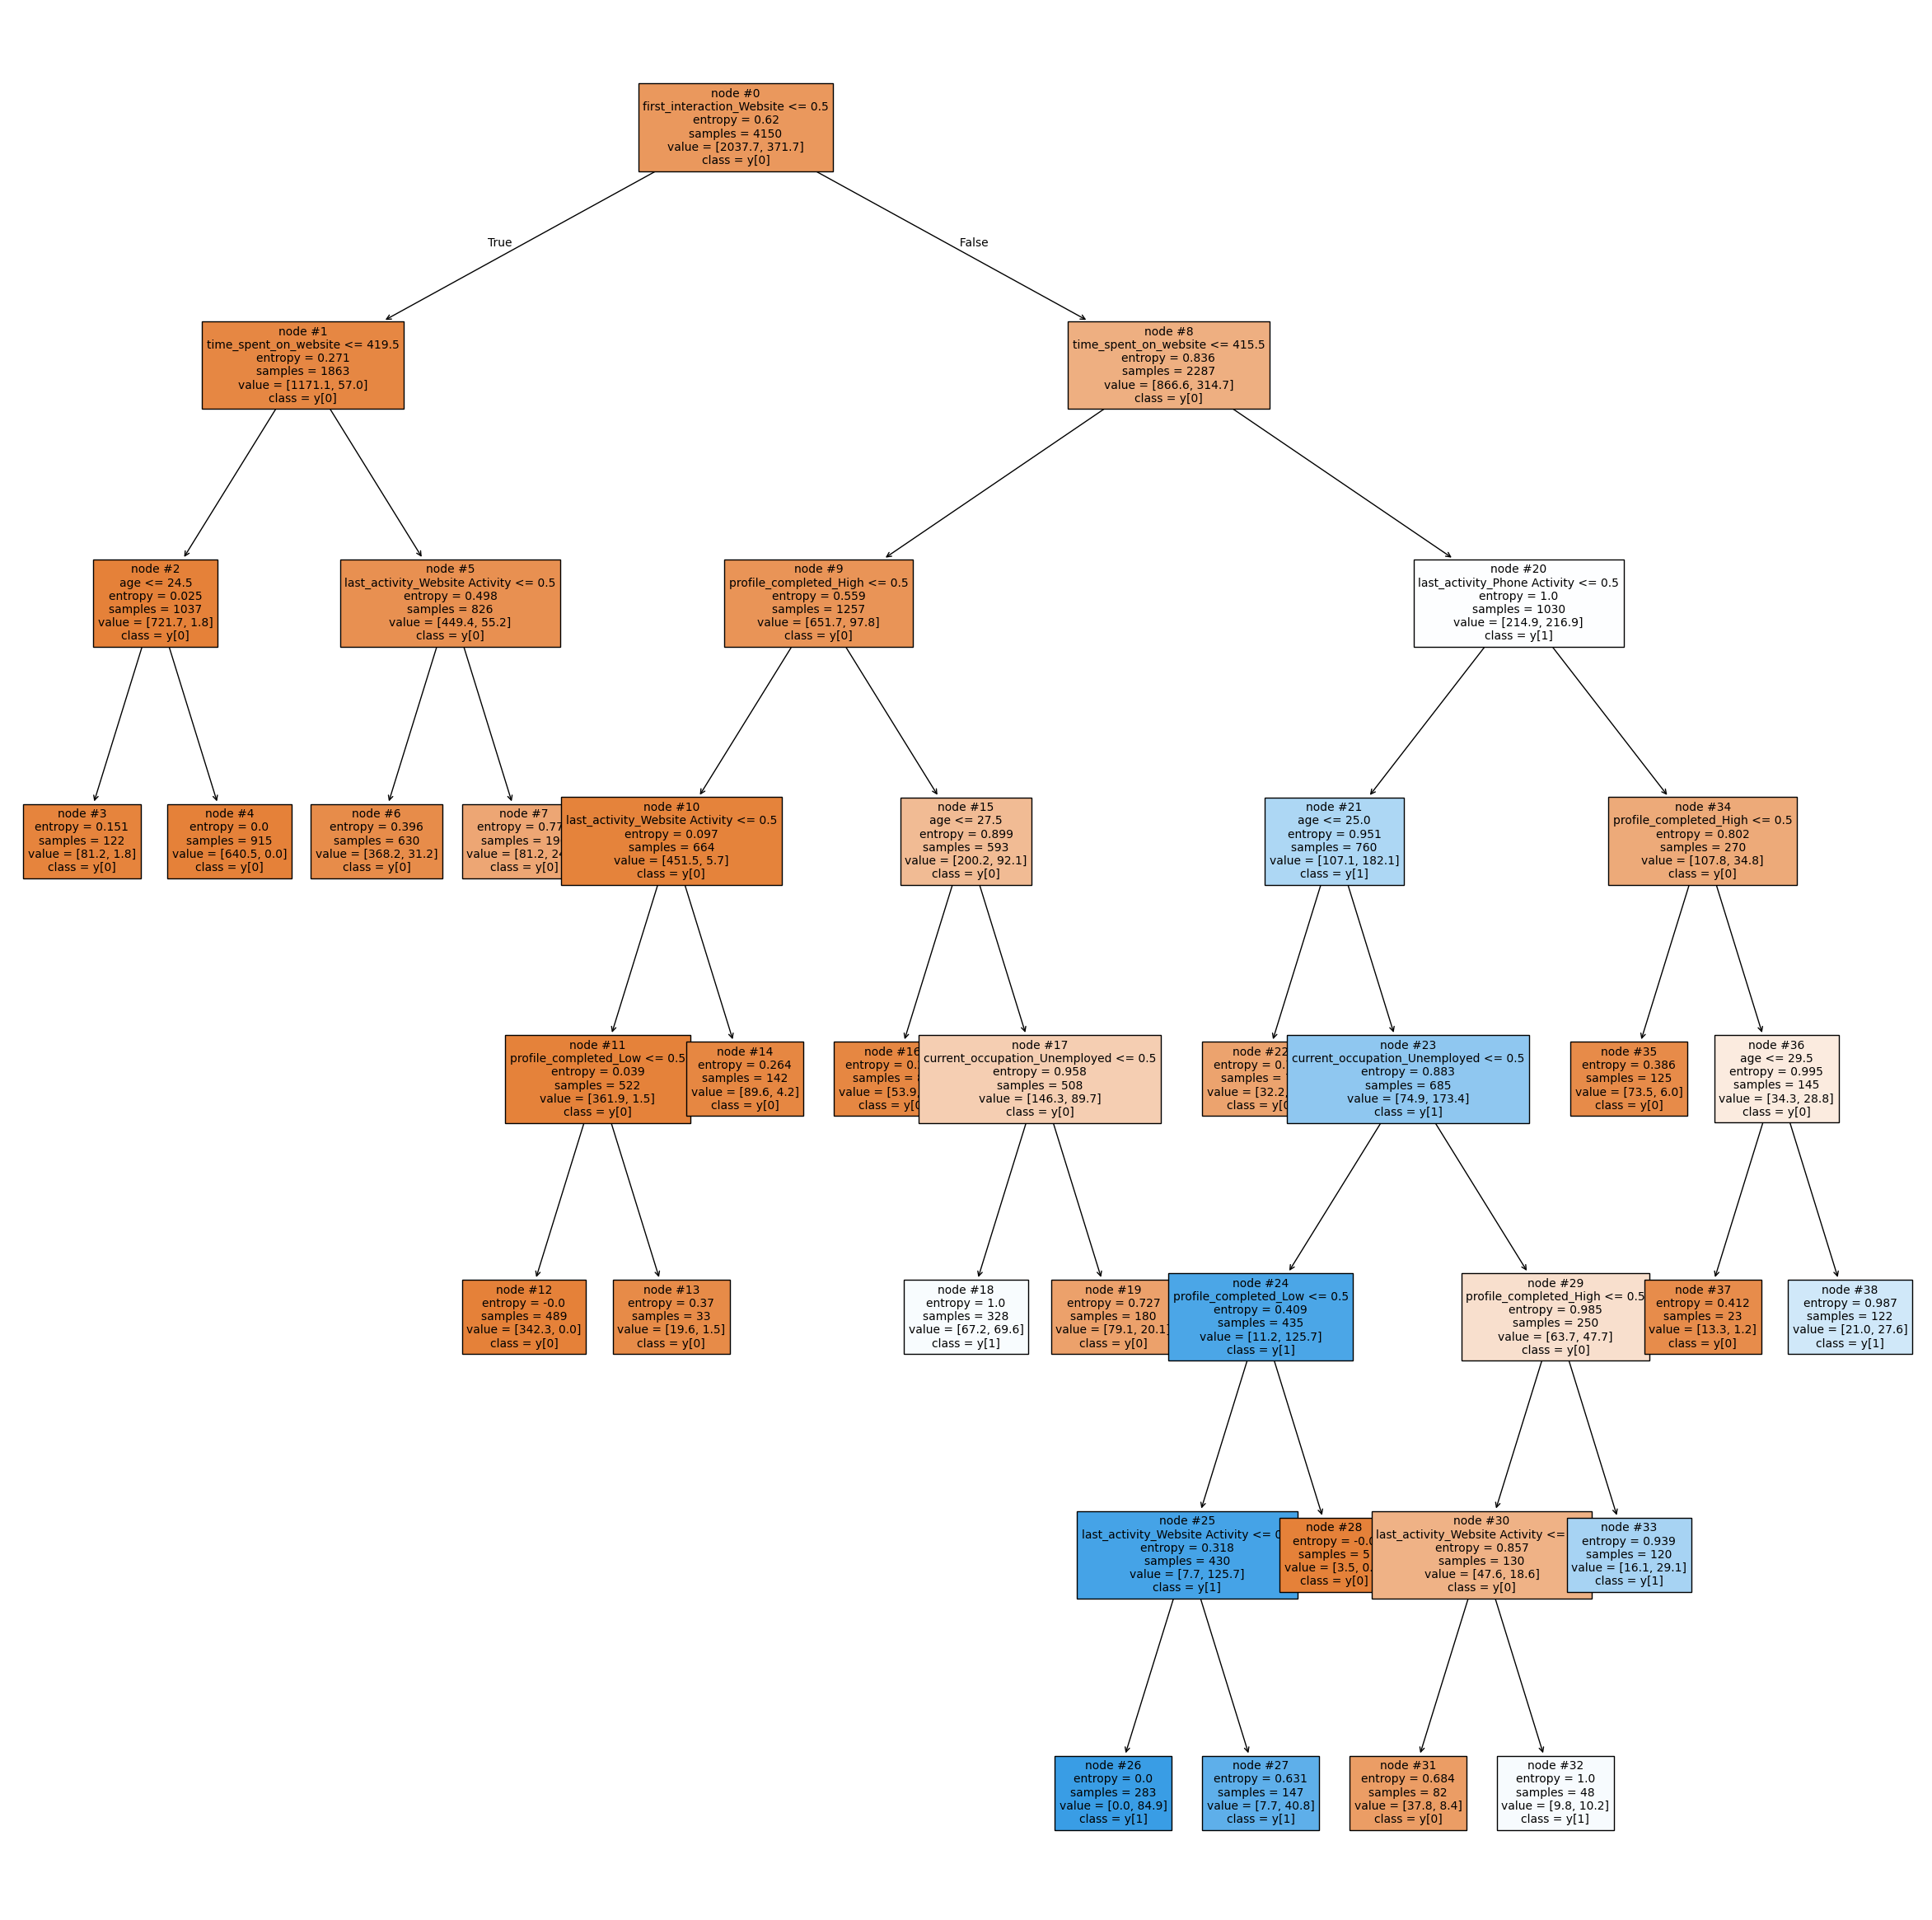

In [35]:
### get a peek at the decision tree
features = list(X.columns)
plt.figure(figsize = (30, 30))
tree.plot_tree(dt_prune, max_depth = 7, feature_names = features, filled = True, fontsize = 10, node_ids = True, class_names = True)
plt.show()

#### Observation:
The first three node are devided by first_interaction_Website and time_spent_on_website. These two factors are important in determine whether a customer turn to paid customer.

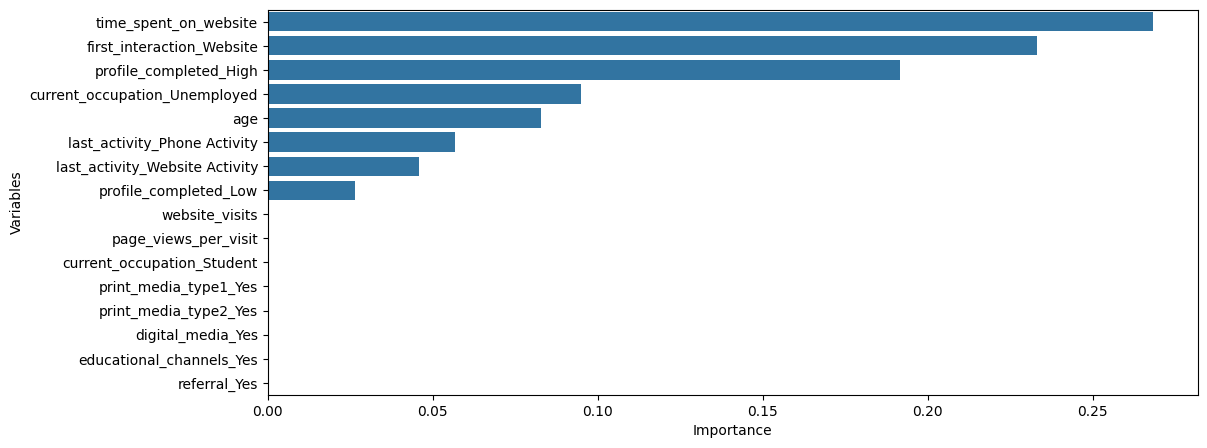

In [36]:
#Plot important features
importances = dt_prune.feature_importances_
columns = X.columns
importance_dt = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (12, 5))
sns.barplot(data = importance_dt, x = importance_dt.Importance, y = importance_dt.index)
plt.ylabel("Variables")
plt.show()

#### Observation:
1. With the decision tree and the importance plot, we can see that if a Lead's first interaction with the service is Website, and has a spent time on website more than 416 minutes, the Lead is more likely to be classify as a paid customer.
2. With a higher profile completion, a lead is more likely to become a paid customer.
3. Also, if a lead is in younger age, below 29, it is less likely to become a paid customer.
4. An unemployed lead is less likely to become a paid customer.
5. Observation 3,4 might because the service is costy for someone in a more vulnerable financial situation. The Pricing Strategy focus on working professionals.

In [37]:
### model_validation
scores_dt_prune = cross_val_score(dt_prune, X_test, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {round(np.average(scores_dt_prune),4)}.")

The average score of the model with K-5 Cross validation is 0.8182.


## Building a Random Forest model

In [38]:
rf = RandomForestClassifier(class_weight = {0: 0.7, 1: 0.3}, random_state = 10)
rf.fit(X_train, y_train)
### train_data_output
y_train_pred_rf = rf.predict(X_train)
### test_data_output
y_test_pred_rf = rf.predict(X_test)

### Preformance of training data in Random Forest model

"RMSE": 0.0220
"MAE": 0.0005
"R-square": 0.9977
"Adj. R-squared": 0.9977
**************************************************
              precision    recall  f1-score   support

           0     1.0000    0.9993    0.9997      2911
           1     0.9984    1.0000    0.9992      1239

    accuracy                         0.9995      4150
   macro avg     0.9992    0.9997    0.9994      4150
weighted avg     0.9995    0.9995    0.9995      4150



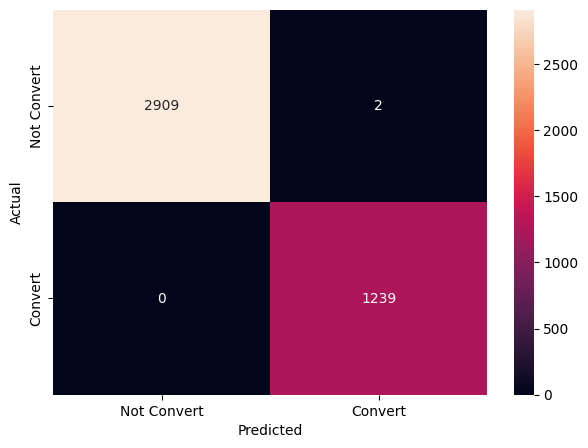

In [39]:
rf_train_perf = model_performance_regression(rf, X_train, y_train)
print("*"*50)
metrics_score(y_train, y_train_pred_rf)

#### Observation:
1. The accuracy is 99.95%. Two of the converted customer is classified as not convert customer.
2. The recall on class 1 is 100%.
3. The model seems to fit well on the training data. Next we should check the testing data to make sure the model is not overfitting.

### Preformance of testing data in Random Forest:

"RMSE": 0.3780
"MAE": 0.1429
"R-square": 0.3180
"Adj. R-squared": 0.2935
**************************************************
              precision    recall  f1-score   support

           0     0.8794    0.9228    0.9006       324
           1     0.7951    0.7029    0.7462       138

    accuracy                         0.8571       462
   macro avg     0.8372    0.8129    0.8234       462
weighted avg     0.8542    0.8571    0.8545       462



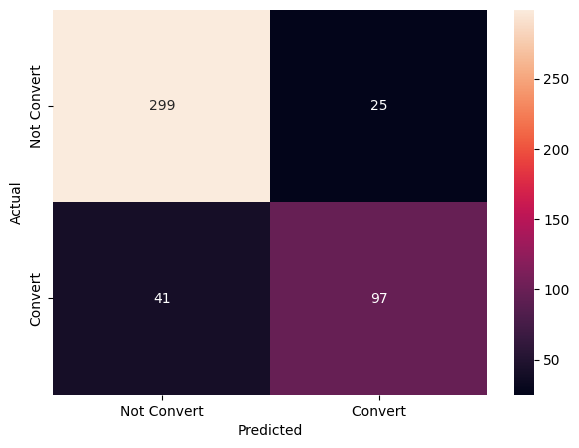

In [40]:
rf_test_perf = model_performance_regression(rf, X_test, y_test)
print("*"*50)
metrics_score(y_test, y_test_pred_rf)

#### Observation:
We can tell that the model is overfitting since the preformance drops significantly in the testing data. Including drop in recall, precision and accuracy.

In [41]:
### model_validation
scores_rf = cross_val_score(rf, X_test, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {round(np.average(scores_rf),4)}.")

The average score of the model with K-5 Cross validation is 0.8312.


## Do we need to prune the tree?
Ans. **Yes**, the random forest model is over-fitting, we should prune the tree.

In [44]:
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,12), 
              'min_samples_leaf': [1, 2, 3, 4] ,
              'max_leaf_nodes' : [5, 10, 15, 20, 25],
              'min_impurity_decrease': [0.001, 0.1],
              'criterion': ['gini', 'entropy'],
              'ccp_alpha':[0.001,0.0,0.01,0.00125]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridS_cv_rf = GridSearchCV(rf, parameters, scoring=scorer, cv=5, n_jobs = -1, verbose = 2)
gridS_cv_rf = gridS_cv_rf.fit(X_train, y_train)

print("Best parameters are {} with CV score={:.4f}." .format(gridS_cv_rf.best_params_,gridS_cv_rf.best_score_))

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits
Best parameters are {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 4} with CV score=0.4205.


#### Observation:
The model has best perfomance with {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 4}.

### Fit and Predict the model after Pruning

In [45]:
# Fit Best estimate model
rf_prune = gridS_cv_rf.best_estimator_
rf_prune.fit(X_train,y_train)
# train_data_output
y_train_pred_rf_prune = rf_prune.predict(X_train)
# test_data_output
y_test_pred_rf_prune = rf_prune.predict(X_test)

### Preformance of training Data of Random Forest Model After Pruning

"RMSE": 0.4142
"MAE": 0.1716
"R-square": 0.1808
"Adj. R-squared": 0.1776
**************************************************
              precision    recall  f1-score   support

           0     0.8088    0.9894    0.8900      2911
           1     0.9474    0.4504    0.6105      1239

    accuracy                         0.8284      4150
   macro avg     0.8781    0.7199    0.7502      4150
weighted avg     0.8501    0.8284    0.8065      4150



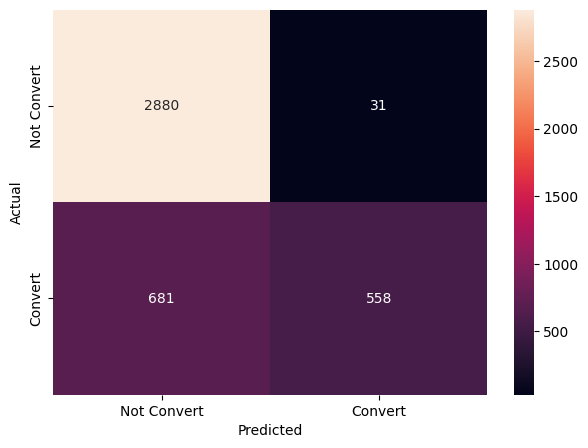

In [46]:
rf_train_perf_prune = model_performance_regression(rf_prune, X_train, y_train)
print("*"*50)
metrics_score(y_train, y_train_pred_rf_prune)

#### Observation:
1. The recall rate is ~0.45, it indicates that 55% of the time will the model classify a customer to a non-convert customer while the customer will actually convert.
2. The Adj. R2 score is only 0.1776, 18% of the variance in the data is explained.
3. The overall accuracy is ~0.83, we should see if the model is overfitting.

### Preformance of testing Data of Random Forest Model After Pruning

"RMSE": 0.4364
"MAE": 0.1905
"R-square": 0.0907
"Adj. R-squared": 0.0580
**************************************************
              precision    recall  f1-score   support

           0     0.7906    0.9907    0.8795       324
           1     0.9464    0.3841    0.5464       138

    accuracy                         0.8095       462
   macro avg     0.8685    0.6874    0.7129       462
weighted avg     0.8372    0.8095    0.7800       462



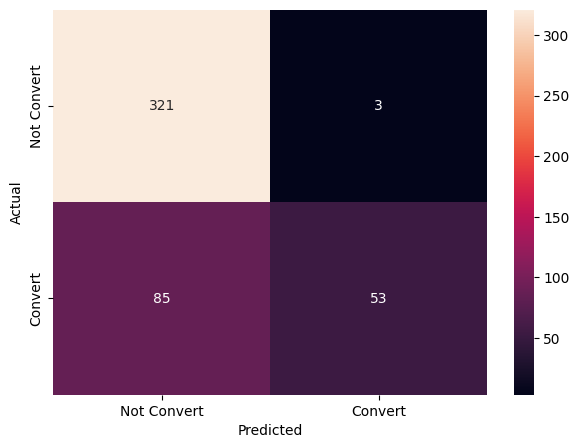

In [49]:
rf_test_perf_prune = model_performance_regression(rf_prune, X_test, y_test)
print("*"*50)
metrics_score(y_test, y_test_pred_rf_prune)

#### Observation:
1. The recall rate is ~0.38, it indicates that 62% of the time will the model classify a customer to a non-convert customer while the customer will actually convert.
2. The Adj. R2 score is only 0.0580, 27% of the variance in the data is explained.
3. The overall accuracy is ~0.81, we compare the training preformance and testing preformance, the accuracy, precision and recall score are close, it indicates that the model is not overfitting. However the model preforms poorly on the recall rate.

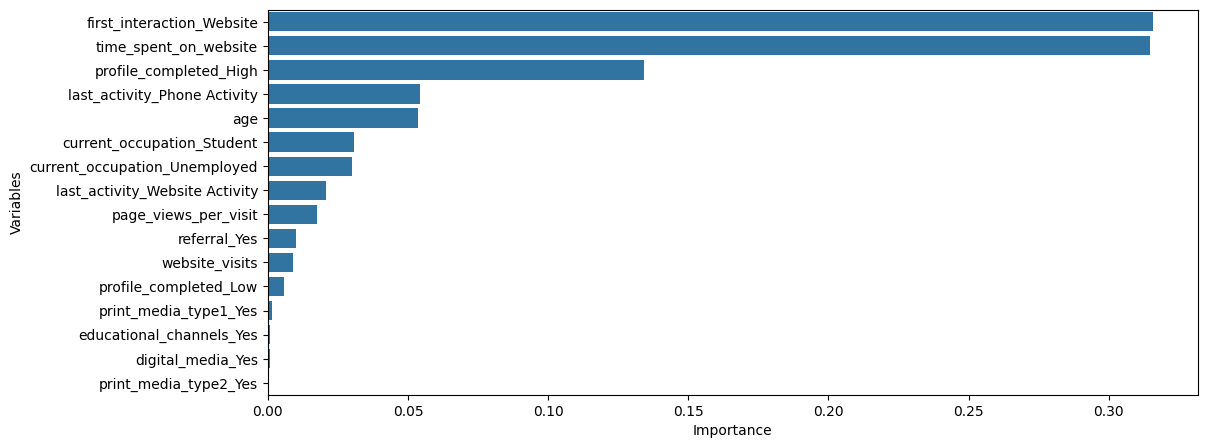

In [48]:
#Plot important features
importances1 = rf_prune.feature_importances_
columns = X.columns
importance_rf = pd.DataFrame(importances1, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (12, 5))
sns.barplot(data = importance_rf, x = importance_rf.Importance, y = importance_rf.index)
plt.ylabel("Variables")
plt.show()

#### Observation:
1. With the importance plot, we can see that if a lead's first interaction with the service is Website, and has a spent time on website, the Lead is more likely to be classify as a paid customer.
2. With a higher profile completion, a lead is more likely to become a paid customer.

In [ ]:
### model_validation
scores_rf_prune = cross_val_score(rf_prune, X_test, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {round(np.average(scores_rf_prune),4)}.")

The average score of the model with K-5 Cross validation is 0.7901.


### Model selection conclusion:
* To better classify a paid customer, we recommand the analyze team to use Decision Tree Model instead of Random Forest model in this case.

## Actionable Insights and Recommendations

1. The company did well on the website UI/UX, the leads whos **first channel to interact is websites** has better impression for the service, and are more likely to convert to a paid customer. 
2. Customer who **spent more time on the website** and is currently **working as professional** are also more likely to convert to a paid customer.
3. A **higher completion on the profile** also triggers the lead to convert to paid customers.
4. The company can spend money on tuning the websites UI/UX to usher the lead spend **more time on the website**.
5. The mobile application need some enhancment, it seems like it is unvalued to the lead.